### Packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

### Reading Datasets 

In [22]:
Train = pd.read_csv("C:/Users/ss00517743/Documents/Dataset/Bigmart Sales/Train.csv")
Test  = pd.read_csv("C:/Users/ss00517743/Documents/Dataset/Bigmart Sales/Test.csv")

In [23]:
Bigmart = pd.concat([Train,Test])
Cols = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
        'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type',
        'Item_Outlet_Sales']
Bigmart = Bigmart[Cols]

In [24]:
Bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Exploratory Data Analysis 

#### Variables Data Types 

In [25]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


#### Converting Date variable to Date Data type 

In [26]:
Bigmart['Outlet_Establishment_Year'] = pd.to_datetime(Bigmart['Outlet_Establishment_Year'])
Bigmart['Outlet_Establishment_Year'] = Bigmart['Outlet_Establishment_Year'].apply(lambda x:x.year)

#### Converting String variable to String Data type 

In [27]:
Bigmart['Outlet_Type'] = Bigmart['Outlet_Type'].astype(str)

#### a) Missing Value in the data set 

In [28]:
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### b) Missing Value Treatement for ItemWeight (Numerical) 

In [29]:
Bigmart['Item_Weight'].fillna(Bigmart['Item_Weight'].mean(),inplace =True)

#### c) Missing Value Treatment for  Outlet_Size (Categorical)

In [30]:
from scipy.stats import mode
outlet_size_mode = Bigmart.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.dropna(axis=0)).mode[0]))
miss_bool = Bigmart['Outlet_Size'].isnull() 
Bigmart.loc[miss_bool,'Outlet_Size'] = Bigmart.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

C:\Users\ss00517743\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


#### d) Missing Value after Imputing 

In [31]:
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### Descriptive Statistics 

####  a) Numerical 

In [32]:
Bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.0,8523.000000
mean,12.792854,0.065953,141.004977,1970.0,2181.288914
std,4.234226,0.051459,62.086938,0.0,1706.499616
min,4.555000,0.000000,31.290000,1970.0,33.290000
25%,9.300000,0.027036,94.012000,1970.0,834.247400
50%,12.792854,0.054021,142.247000,1970.0,1794.331000
75%,16.000000,0.094037,185.855600,1970.0,3101.296400
max,21.350000,0.328391,266.888400,1970.0,13086.964800


#### b) Categorical 

##### Item Fat Content 

In [33]:
Bigmart_Fat = Bigmart.groupby('Item_Fat_Content',as_index=False)['Item_Identifier'].count().sort_values(by='Item_Identifier',ascending=False)
print(Bigmart_Fat)

  Item_Fat_Content  Item_Identifier
1          Low Fat             8485
2          Regular             4824
0               LF              522
4              reg              195
3          low fat              178


Text(0,0.5,'Total')

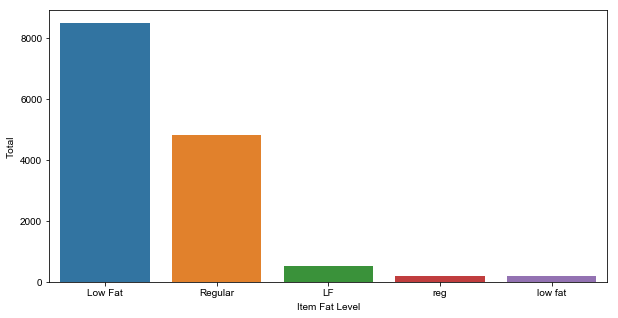

In [34]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,1,1)
sns.barplot(Bigmart_Fat['Item_Fat_Content'],Bigmart_Fat['Item_Identifier'])
sns.set(font_scale=2)
plt.xlabel("Item Fat Level")
plt.ylabel("Total")

##### Item_Type

In [35]:
Bigmart_Item_type = Bigmart.groupby('Item_Type',as_index=False)['Item_Identifier'].count().sort_values(by='Item_Identifier',ascending =False)
print(Bigmart_Item_type)

                Item_Type  Item_Identifier
6   Fruits and Vegetables             2013
13            Snack Foods             1989
9               Household             1548
5            Frozen Foods             1426
4                   Dairy             1136
0            Baking Goods             1086
3                  Canned             1084
8      Health and Hygiene              858
10                   Meat              736
14            Soft Drinks              726
1                  Breads              416
7             Hard Drinks              362
11                 Others              280
15          Starchy Foods              269
2               Breakfast              186
12                Seafood               89


Text(0,0.5,'Total')

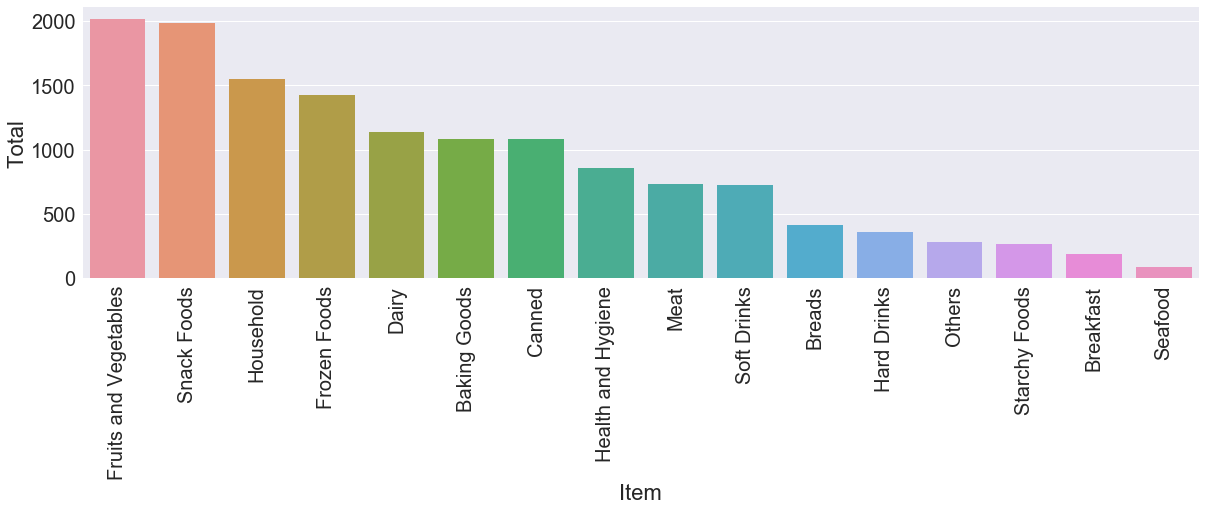

In [36]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,1,1)
sns.barplot(Bigmart_Item_type['Item_Type'],Bigmart_Item_type['Item_Identifier'])
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel("Item")
plt.ylabel("Total")

#### Outlet Size

In [37]:
Bigmart_Outletsize = Bigmart.groupby('Outlet_Size',as_index=False)['Outlet_Identifier'].count().sort_values(by='Outlet_Identifier',ascending=False)
print(Bigmart_Outletsize)

  Outlet_Size  Outlet_Identifier
2       Small               7996
1      Medium               4655
0        High               1553
